In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import os
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [5]:
base_dir = os.getcwd()  # 'C:/Users/loved/mulit_disease_model/multi_disease_model/notebook'
file_path = os.path.join(base_dir, '..', 'dataset', 'heart.csv')
heart_dataset = pd.read_csv(file_path)
heart_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [7]:
heart_dataset.shape

(1025, 14)

In [8]:
heart_dataset.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [9]:
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
heart_dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
heart_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
heart_dataset['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [13]:
X = heart_dataset.drop(columns = 'target', axis = 1)
Y = heart_dataset['target']

In [14]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [15]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


### Train Test and Split data 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3, stratify = Y)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


## Logistic Regression

In [18]:
# Fit the scaler and transform as DataFrame
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced', max_iter=1000)


# Train the model on the scaled training data
model.fit(X_train_scaled, Y_train)

# Predict on training data
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print(" Accuracy on Training Data: ", training_data_accuracy)

# Predict on test data
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(" Accuracy on Test Data: ", test_data_accuracy)


 Accuracy on Training Data:  0.8634146341463415
 Accuracy on Test Data:  0.8439024390243902


####  Confusion Matrix

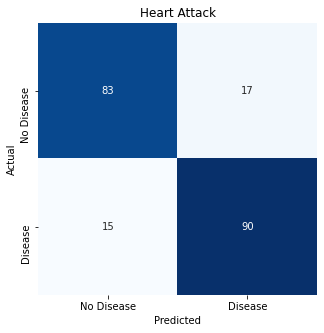

 Precision:  0.8411214953271028
 Recall:  0.8571428571428571
 F1 Score:  0.8490566037735849

 Classification Report:
              precision    recall  f1-score   support

  No Disease       0.85      0.83      0.84       100
     Disease       0.84      0.86      0.85       105

    accuracy                           0.84       205
   macro avg       0.84      0.84      0.84       205
weighted avg       0.84      0.84      0.84       205



In [19]:
# ---- Confusion Matrix ----
cm = confusion_matrix(Y_test, X_test_prediction)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'], cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heart Attack')
plt.show()

# ---- Precision, Recall, F1 Score ----
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

print(" Precision: ", precision)
print(" Recall: ", recall)
print(" F1 Score: ", f1)

# ---- Full Classification Report ----
print("\n Classification Report:")
print(classification_report(Y_test, X_test_prediction, target_names=["No Disease", "Disease"]))


In [36]:
print("Target Class Distribution:\n", Y_train.value_counts())


Target Class Distribution:
 target
1    421
0    399
Name: count, dtype: int64


In [38]:
# Sample input values (replace with real patient data)
input_values = (44, 1, 2, 130, 233, 0, 1, 179, 1, 0.4, 2, 0, 2)
input_array = np.asarray(input_values).reshape(1, -1)

# Scale the input
input_scaled = pd.DataFrame(scaler.transform(input_array), columns=X_train.columns)

# Predict
prediction = model.predict(input_scaled)
print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")


Prediction: Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
# Save model and scaler
with open("../models/heart_disease_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("../scaler/heart_disease_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Save feature names
with open("../models/heart_feature_names.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)


In [45]:
import pickle

# File paths
model_path = "../models/heart_disease_model.pkl"
scaler_path = "../scaler/heart_disease_scaler.pkl"

# 1. Save the trained model and scaler
pickle.dump(model, open(model_path, "wb"))  # Save model
with open(scaler_path, "wb") as f:
    pickle.dump(scaler, f)  # Save scaler

print("✅ Model and scaler saved successfully.")

# 2. Load the saved model and scaler
loaded_model = pickle.load(open(model_path, "rb"))
loaded_scaler = pickle.load(open(scaler_path, "rb"))

print("✅ Model and scaler loaded successfully.")


✅ Model and scaler saved successfully.
✅ Model and scaler loaded successfully.


In [46]:
'''filename = "../models/heart_disease_model.pkl"
pickle.dump(model, open(filename, "wb"))
#loading the saved model
loaded_model = pickle.load(open("../models/heart_disease_model.pkl", "rb"))
'''

'filename = "../models/heart_disease_model.pkl"\npickle.dump(model, open(filename, "wb"))\n#loading the saved model\nloaded_model = pickle.load(open("../models/heart_disease_model.pkl", "rb"))\n'

In [47]:
# Sample input values (replace with real patient data)
input_values = (44, 1, 2, 130, 233, 0, 1, 179, 1, 0.4, 2, 0, 2)
input_array = np.asarray(input_values).reshape(1, -1)

# Scale the input
input_scaled = pd.DataFrame(scaler.transform(input_array), columns=X_train.columns)

# Predict
prediction = model.predict(input_scaled)
print("Prediction:", "Heart Disease" if prediction[0] == 1 else "No Heart Disease")


Prediction: Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
